In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#function to generate model report
def model_report(y,y_predict):
    print("Accuracy: ",accuracy_score(y,y_predict))
    print("Recall: ",recall_score(y,y_predict))
    print("Precision: ",precision_score(y,y_predict))
    print("F1_score: ",f1_score(y,y_predict))

In [4]:
#function to generate ROC curve
def generate_roc_curve(model,X_test):
    y_predict_prob = model.predict_proba(X_test)[:,1]
    fpr,tpr,threshold = roc_curve(Y_test,y_predict_prob)
    auc = roc_auc_score(Y_test,y_predict_prob)
    plt.plot(fpr,tpr,label="ROC Curve with area="+str(auc))
    plt.show()
    pass

In [5]:
dataset = pd.read_csv('D:/ML/Dataset/creditcard.csv')

In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X = dataset.loc[:,dataset.columns!='Class']
Y = dataset.loc[:,dataset.columns=='Class']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [9]:
print(dataset['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [10]:
Y_train['Class'].value_counts()

0    190477
1       343
Name: Class, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression().fit(X_train,Y_train)
Y_predict = model.predict(X_test)

In [13]:
print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_predict))

Confusion Matrix:
 [[93800    38]
 [   78    71]]


In [14]:
model_report(Y_test,Y_predict)

Accuracy:  0.9987657867577431
Recall:  0.47651006711409394
Precision:  0.6513761467889908
F1_score:  0.5503875968992248


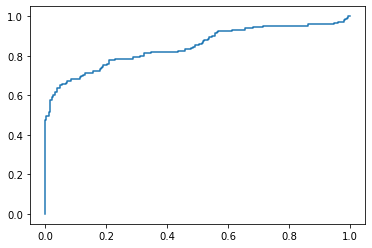

In [15]:
generate_roc_curve(model,X_test)

# SMOTE(Synthetic Minority Oversampling Technique)

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(random_state =43,ratio = 1.0)

In [24]:
#Imbalanced Data count 
Y_train['Class'].value_counts()

0    190477
1       343
Name: Class, dtype: int64


In [26]:
X_train_smote,Y_train_smote = smote.fit_sample(X_train,Y_train)

In [30]:
unique,count = np.unique(Y_train_smote,return_counts=True)
Y_train_smote_count = {i:j for (i,j) in zip(unique,count)}

In [31]:
#Balanced data count after appliyng SMOTE
Y_train_smote_count

{0: 190477, 1: 190477}

In [32]:
smote_model = LogisticRegression().fit(X_train_smote,Y_train_smote)
Y_predict_smote = smote_model.predict(X_test)

In [33]:
model_report(Y_test,Y_predict_smote)

Accuracy:  0.9853915967101833
Recall:  0.8859060402684564
Precision:  0.08870967741935484
F1_score:  0.16127061698228468


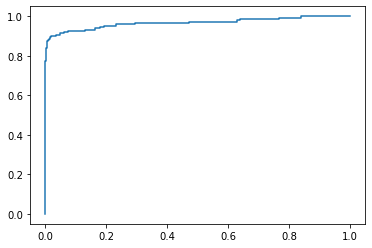

In [34]:
generate_roc_curve(smote_model,X_test)